<a href="https://colab.research.google.com/github/ahincho/robot-trading-challenge/blob/main/Robot-Trading-Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Robot Trading Challenge**

**a. Descripción:** El Challenge Robot Trading consiste en crear un Robot de Trading en Python para tomar decisiones de compra y venta de Bitcoin en tiempo real. El proyecto consta de los siguientes puntos que expondré a continuación.

**b. Configuración del Ambiente:** Configurar el entorno de desarrollo con Python 3.x y librerías clave.

**c. Obtención de Datos:** Obtener datos de precios históricos de Bitcoin a través de una API y datos actuales mediante Web Scraping.

**d. Limpieza de Datos:** Limpiar datos, eliminando outliers, valores nulos y duplicados, y calcular el precio promedio.

**e. Toma de Decisiones:** Tomar decisiones de compra/venta en tiempo real basadas en la comparación del precio actual y la tendencia.

**f. Visualización de Datos:** Visualizar datos utilizando Matplotlib para mostrar la evolución de los precios y las decisiones de trading.

**g. Automatización:** Automatizar el proceso de toma de decisiones y actualización de gráficos, ejecutándolo cada 5 minutos.


In [1]:
from IPython.display import Image

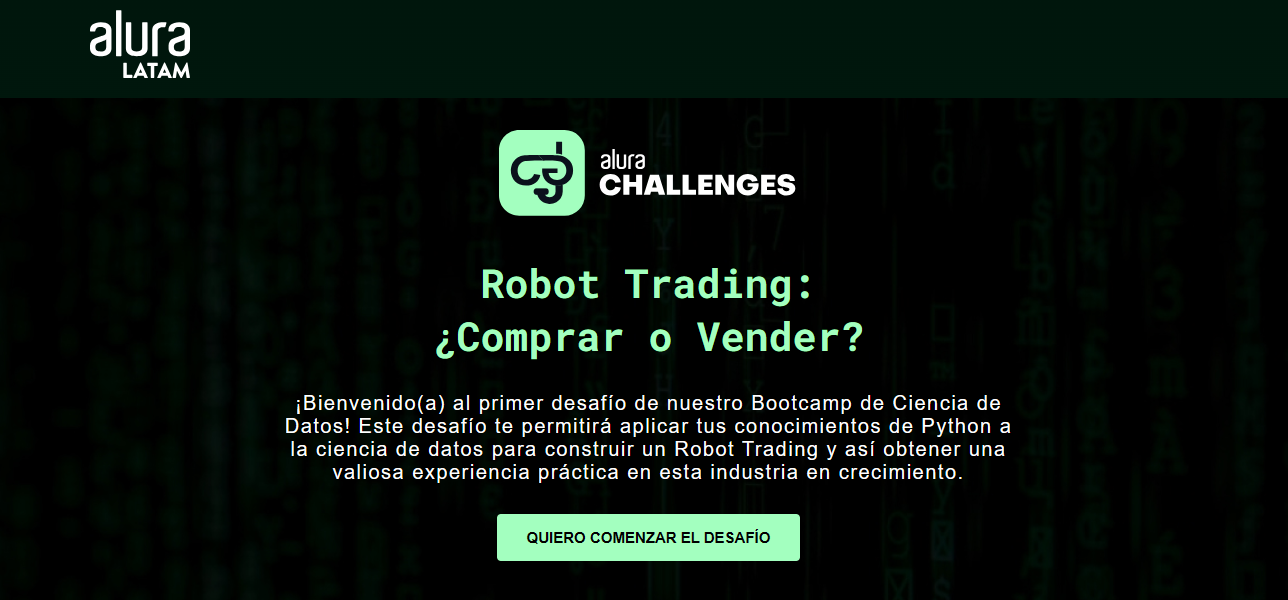

In [3]:
image_url = '/content/Enunciado.png'
Image(image_url)

## **1. Configuración del Ambiente**

In [4]:
# Version de Python
!python --version

Python 3.10.12


In [5]:
# Instalar Numpy
!python -m pip install numpy

In [6]:
# Instalar Pandas
!python -m pip install pandas

In [7]:
# Instalar Matplotlib
!python -m pip install matplotlib

In [8]:
# Importar las librerias
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize = (15, 10))

In [10]:
# Verificar las versiones
print(f'Numpy : {np.__version__}')
print(f'Pandas : {pd.__version__}')
print(f'Matplotlib : {matplotlib.__version__}')

Numpy : 1.23.5
Pandas : 1.5.3
Matplotlib : 3.7.1


## **2. Obtención de los Datos**

### **a. Información del Bitcoin con Yahoo Finance**

In [11]:
# Instalar la libreria Yahoo Finance : https://pypi.org/project/yfinance/
!pip3 install yfinance

In [12]:
# Importar la libreria de Yahoo Finance
import yfinance as yf

In [13]:
# Recuperar los datos historicos de la ultima semana en intervalos de 5m
def import_financial_database(ticker, interval, start, end):
  data = yf.Ticker(ticker)
  history = data.history(interval = interval, start = start, end = end)
  return history

In [14]:
# Debemos importar la libreria Datetime para trabajar con fechas
import datetime
# Definimos el activo que vamos a recuperar y el periodo
bitcoin_ticker = 'BTC-USD'
interval = '5m'
today = datetime.date.today()
start = (today - datetime.timedelta(days = 7)).strftime('%Y-%m-%d')
end = (today + datetime.timedelta(days = 1)).strftime('%Y-%m-%d')

In [15]:
# Revisando los datos o argumentos a utilizar
print(f'Ticker : {bitcoin_ticker}')
print(f'Interval : {interval}')
print(f'Start Date : {start}')
print(f'End Date : {end}')

Ticker : BTC-USD
Interval : 5m
Start Date : 2023-11-03
End Date : 2023-11-11


In [16]:
# Recuperamos la informacion del Bitcoin usando 'yfinance'
df_bitcoin = import_financial_database(bitcoin_ticker, interval, start, end)

In [17]:
# Revisamos el tipo de dato que devuelve Ticker e History
type(df_bitcoin)

pandas.core.frame.DataFrame

In [18]:
# Devuelve un Dataframe, vamos revisar algunas filas
df_bitcoin.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-11-03 00:00:00+00:00,34942.472656,34942.472656,34883.429688,34883.429688,0,0.0,0.0
2023-11-03 00:05:00+00:00,34866.761719,34883.429688,34852.617188,34870.574219,0,0.0,0.0
2023-11-03 00:10:00+00:00,34876.261719,34910.273438,34876.261719,34891.488281,0,0.0,0.0
2023-11-03 00:15:00+00:00,34885.660156,34885.660156,34830.425781,34830.425781,0,0.0,0.0
2023-11-03 00:20:00+00:00,34851.636719,34853.625000,34843.449219,34843.449219,0,0.0,0.0
2023-11-03 00:25:00+00:00,34833.437500,34833.437500,34801.046875,34803.000000,0,0.0,0.0
2023-11-03 00:30:00+00:00,34789.164062,34789.164062,34770.187500,34770.187500,0,0.0,0.0
2023-11-03 00:35:00+00:00,34753.316406,34753.316406,34665.085938,34665.085938,11558912,0.0,0.0
2023-11-03 00:40:00+00:00,34713.839844,34731.152344,34713.839844,34731.152344,2750464,0.0,0.0


In [19]:
# Revisamos los ultimos registros
df_bitcoin.sort_values(by = 'Datetime', ascending = False)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-11-10 01:15:00+00:00,36547.332031,36591.765625,36547.332031,36591.765625,3227648,0.0,0.0
2023-11-10 01:10:00+00:00,36546.093750,36546.093750,36520.363281,36520.363281,16699392,0.0,0.0
2023-11-10 01:05:00+00:00,36534.414062,36544.937500,36528.820312,36544.937500,14667776,0.0,0.0
2023-11-10 01:00:00+00:00,36488.000000,36531.722656,36479.574219,36531.722656,770048,0.0,0.0
2023-11-10 00:55:00+00:00,36510.371094,36510.371094,36485.851562,36485.851562,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-03 00:20:00+00:00,34851.636719,34853.625000,34843.449219,34843.449219,0,0.0,0.0
2023-11-03 00:15:00+00:00,34885.660156,34885.660156,34830.425781,34830.425781,0,0.0,0.0
2023-11-03 00:10:00+00:00,34876.261719,34910.273438,34876.261719,34891.488281,0,0.0,0.0


### **b. Análisis de la Información de Yahoo Finance**

In [20]:
# Es un Dataframe de Pandas, usamos todas las operaciones comunes
# No tenemos ningun registro nulo de momento
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1918 entries, 2023-11-03 00:00:00+00:00 to 2023-11-10 01:15:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1918 non-null   float64
 1   High          1918 non-null   float64
 2   Low           1918 non-null   float64
 3   Close         1918 non-null   float64
 4   Volume        1918 non-null   int64  
 5   Dividends     1918 non-null   float64
 6   Stock Splits  1918 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 119.9 KB


In [22]:
# Estadistica Descriptiva
# Para que la API de Yahoo Finance ya no expone 'Dividends' ni 'Splits
# El Bitcoin en todos sus precios varia entre un 1% y 2%
df_bitcoin.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1918.000000,1918.000000,1918.000000,1918.000000,1.918000e+03,1918.0,1918.0
mean,35239.194763,35255.608283,35223.383134,35239.983845,2.409944e+07,0.0,0.0
std,656.051056,663.556720,648.363110,656.104708,6.017188e+07,0.0,0.0
min,34154.750000,34154.750000,34154.750000,34154.750000,0.000000e+00,0.0,0.0
25%,34796.504883,34809.002930,34788.660156,34799.032227,0.000000e+00,0.0,0.0
50%,35051.148438,35062.169922,35040.242188,35048.632812,3.114496e+06,0.0,0.0
75%,35363.007812,35371.218750,35349.422852,35360.964844,2.247885e+07,0.0,0.0
max,37904.132812,37926.257812,37810.367188,37926.257812,8.399258e+08,0.0,0.0


In [23]:
# Podemos desechar las columnas 'dividends' y 'stock splits'
df_bitcoin.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [24]:
# Observamos nuestro Dataframe despues de dropear las columnas
df_bitcoin.head(10)

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-11-03 00:00:00+00:00,34942.472656,34942.472656,34883.429688,34883.429688,0
2023-11-03 00:05:00+00:00,34866.761719,34883.429688,34852.617188,34870.574219,0
2023-11-03 00:10:00+00:00,34876.261719,34910.273438,34876.261719,34891.488281,0
2023-11-03 00:15:00+00:00,34885.660156,34885.660156,34830.425781,34830.425781,0
2023-11-03 00:20:00+00:00,34851.636719,34853.625000,34843.449219,34843.449219,0
2023-11-03 00:25:00+00:00,34833.437500,34833.437500,34801.046875,34803.000000,0
2023-11-03 00:30:00+00:00,34789.164062,34789.164062,34770.187500,34770.187500,0
2023-11-03 00:35:00+00:00,34753.316406,34753.316406,34665.085938,34665.085938,11558912
2023-11-03 00:40:00+00:00,34713.839844,34731.152344,34713.839844,34731.152344,2750464


In [25]:
# Seria bueno redefinir la funcion para evitar los datos nulos o vacios
# Tambien seria bueno eliminar la variable 'Volume' que no participara
# Recuperar los datos historicos de la ultima semana en intervalos de 5m
def import_financial_database(ticker, interval, start, end):
  data = yf.Ticker(ticker)
  history = data.history(interval = interval, start = start, end = end)
  history.drop(['Dividends', 'Stock Splits', 'Volume'], axis = 1, inplace = True)
  return history

In [26]:
# Definimos el activo que vamos a recuperar y el periodo
bitcoin_ticker = 'BTC-USD'
interval = '5m'
today = datetime.date.today()
start = (today - datetime.timedelta(days = 7)).strftime('%Y-%m-%d')
end = (today + datetime.timedelta(days = 1)).strftime('%Y-%m-%d')

In [27]:
# Importamos nuevamente nuestro historico del Bitcoin
df_bitcoin = import_financial_database(bitcoin_ticker, interval, start, end)

In [28]:
# Revision y estadistica descriptiva
df_bitcoin.describe()

,Open,High,Low,Close
count,1919.000000,1919.000000,1919.000000,1919.000000
mean,35239.904835,35256.316596,35224.098670,35240.700153
std,656.617204,664.108871,648.951508,656.683675
min,34154.750000,34154.750000,34154.750000,34154.750000
25%,34796.791016,34809.029297,34788.792969,34799.107422
50%,35051.203125,35062.207031,35040.910156,35048.921875
75%,35363.517578,35371.369141,35350.046875,35361.277344
max,37904.132812,37926.257812,37810.367188,37926.257812


<Axes: >

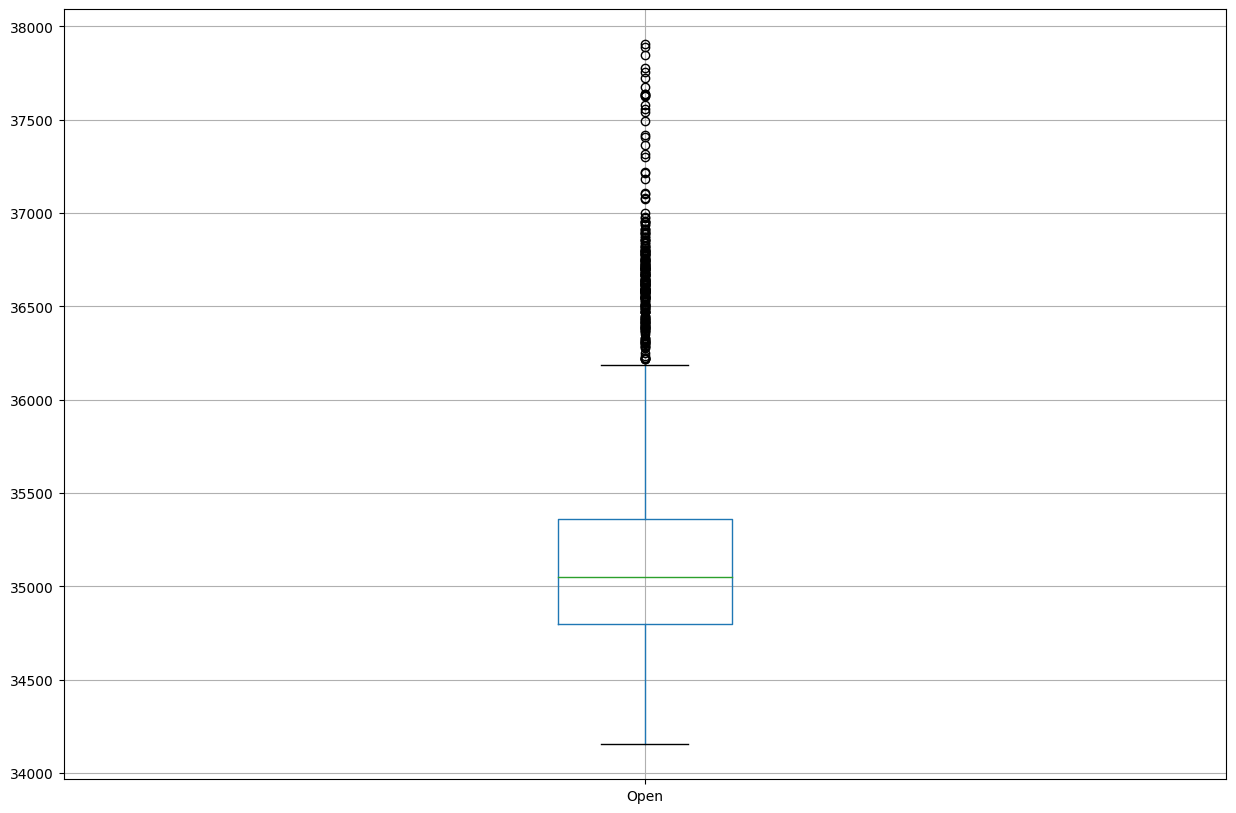

In [29]:
# Grafico de Caja para la variable Open
# Como vemos hay mucho ruido en los valores, tal vez por la volatilidad
df_bitcoin.boxplot('Open')

<Axes: >

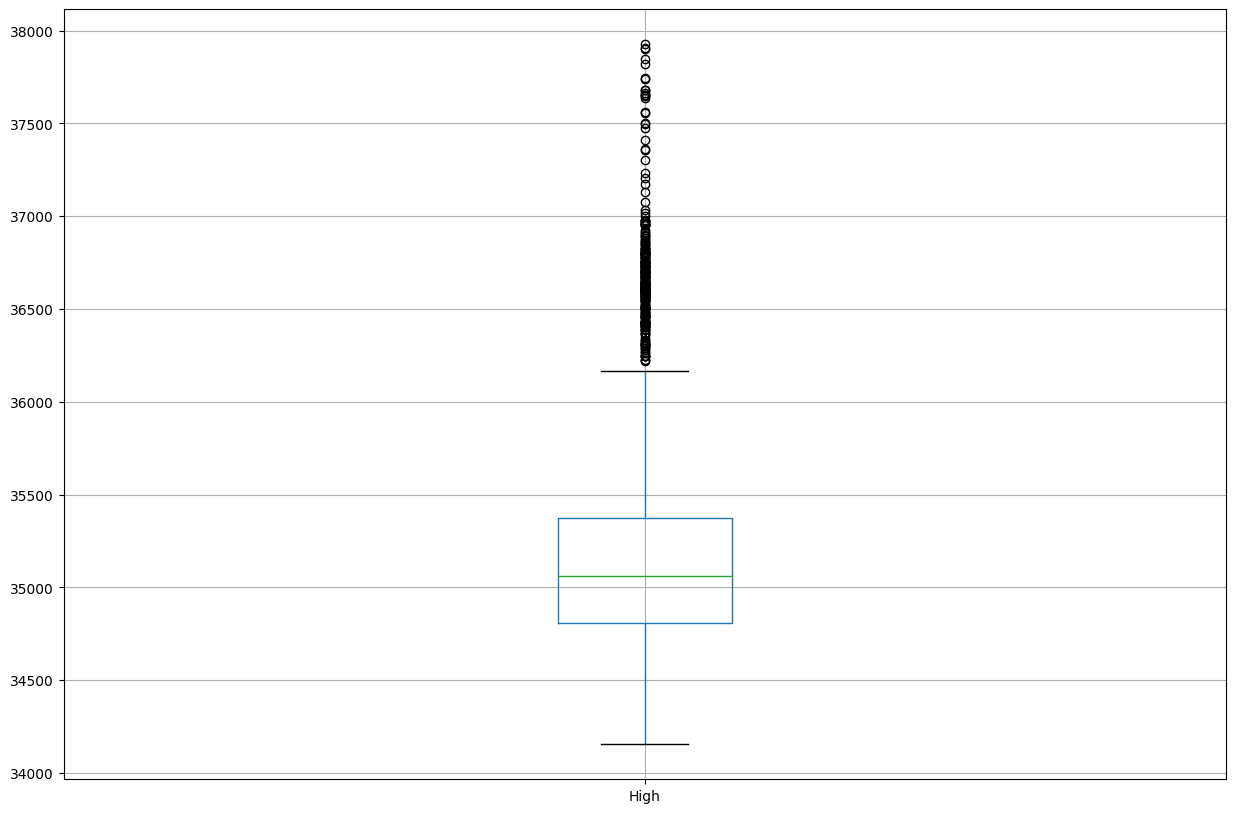

In [30]:
# Grafico de Caja para la variable High
# Aqui tambien existe mucho ruido y outliers
df_bitcoin.boxplot('High')

<Axes: >

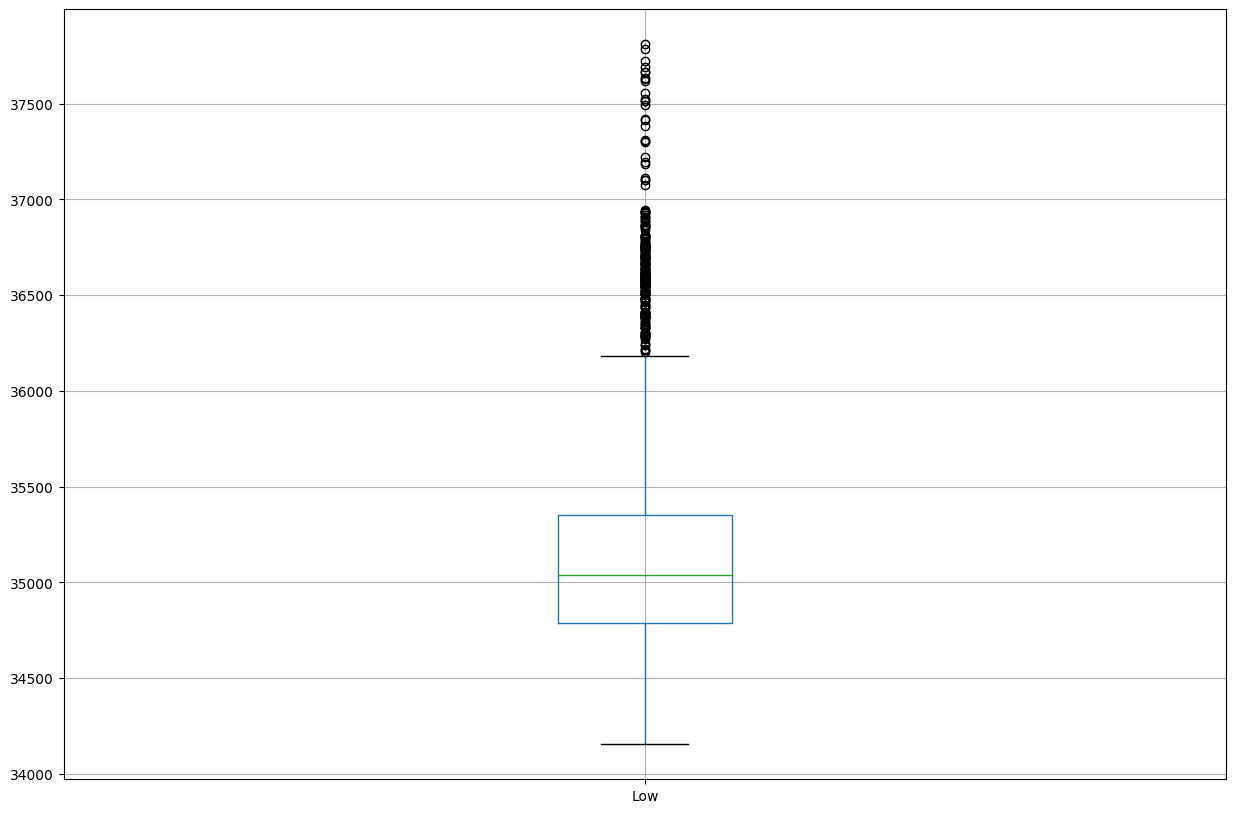

In [31]:
# Grafico de Caja para la variable Low
df_bitcoin.boxplot('Low')

<Axes: >

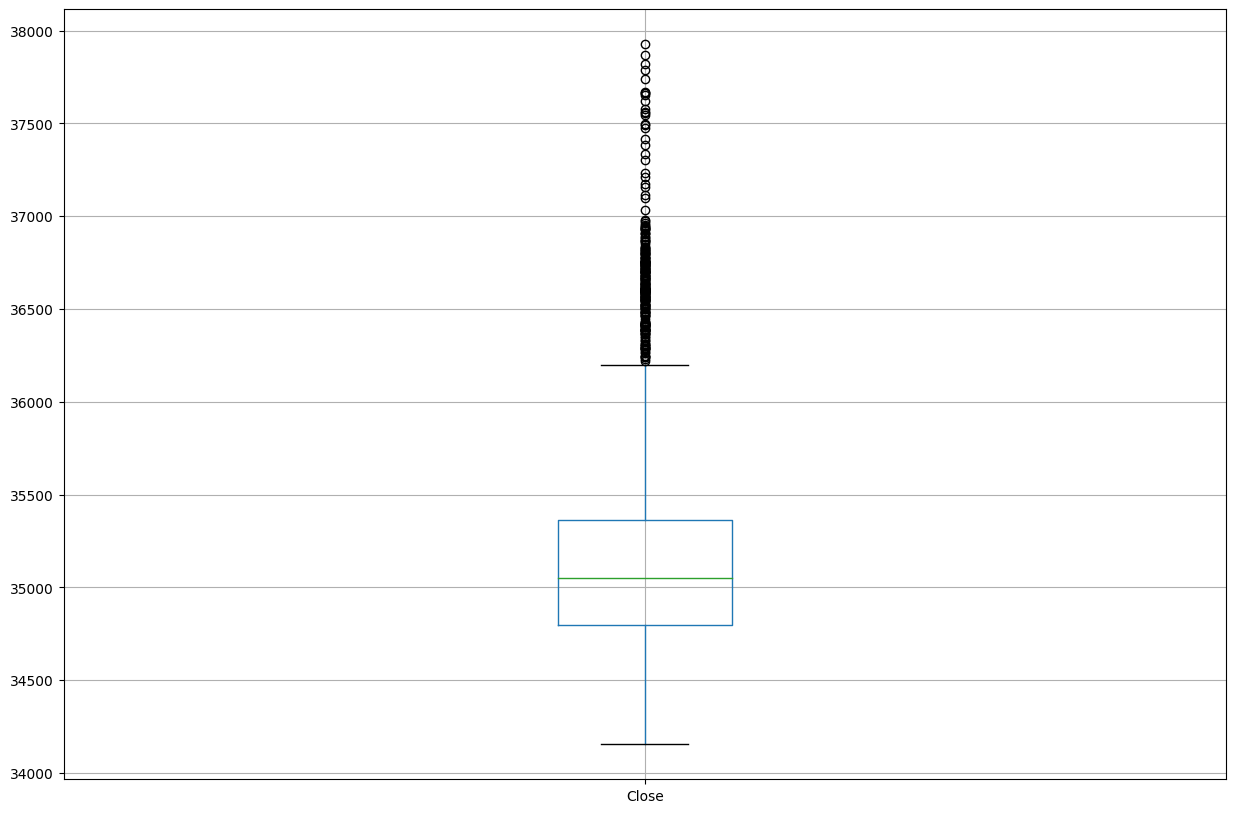

In [32]:
# Grafico de Caja para la variable Close
df_bitcoin.boxplot('Close')

In [33]:
# Tenemos las siguientes variables en nuestro Dataframe
list(df_bitcoin.columns)

['Open', 'High', 'Low', 'Close']

<Axes: >

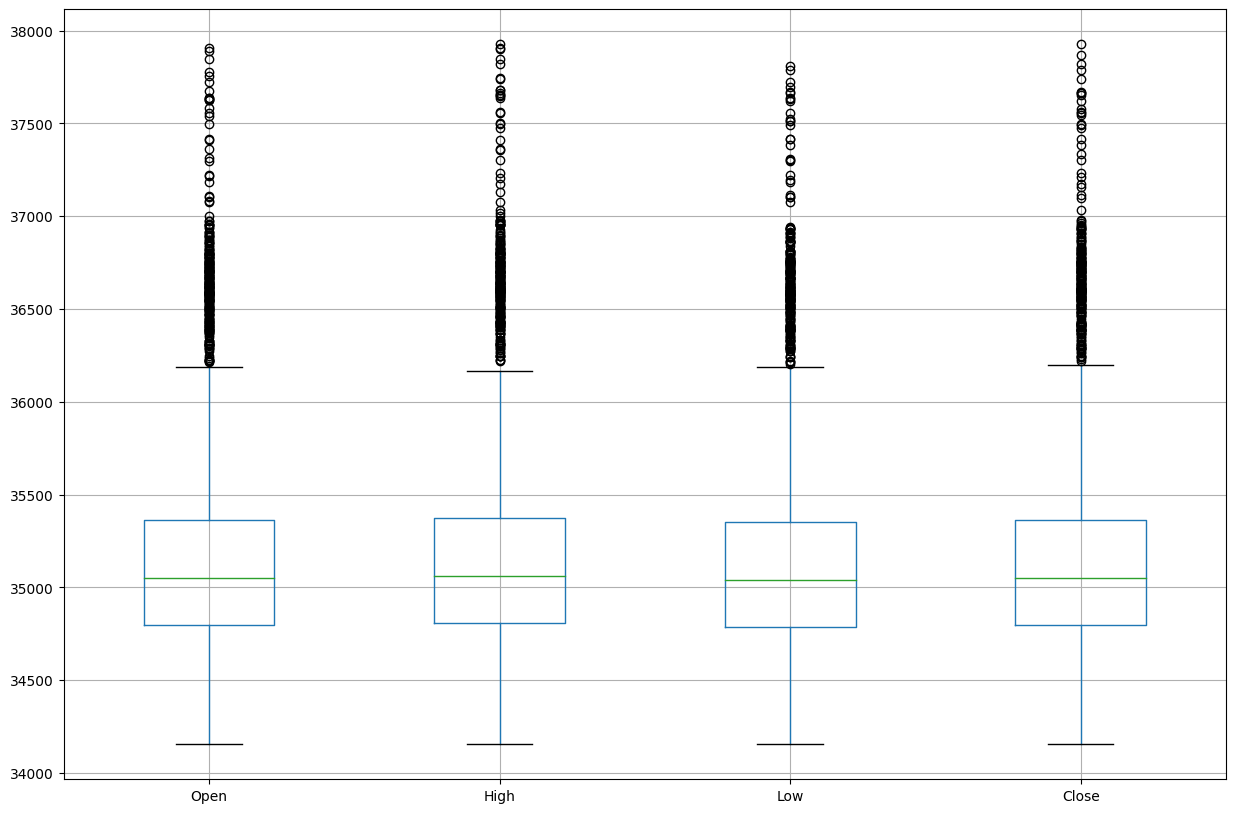

In [37]:
# Grafico de cajas o bigotes para nuestras variables
df_bitcoin.boxplot()

## **3. Obtener las Tendencias usando Web Scraping**

In [ ]:
# Para ello vamos a utilizar la siguiente pagina web
coin_market_url = 'https://coinmarketcap.com/'

In [ ]:
# Vamos a empezar con nuestro Web Scraping
# Importamos las librerias de Request y Beautiful Soup
import requests
from bs4 import BeautifulSoup

In [ ]:
# Recuperamos el contenido del endpoint para el Bitcoin
response = requests.get(coin_market_url)

In [ ]:
# Verificamos que la respuesta haya sido exitosa
print(response)

<Response [200]>


In [ ]:
# Parseamos el contenido a un objeto de Beautiful Soup
html = response.text
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
# Ahora vamos a buscar los indicadores que nos han solicitado
tags = ['sc-4984dd93-0 kKpPOn', 'sc-4984dd93-0 kKpPOn fall', 'sc-4984dd93-0 kKpPOn rise']
currencies = soup.find_all('p', class_ = 'sc-4984dd93-0 kKpPOn')

In [ ]:
# Vamos a ver el contenido
for currency in currencies:
  print(currency.get_text(strip = True))

Bitcoin
Ethereum
Tether USDt
BNB
XRP
USDC
Solana
Cardano
Dogecoin
TRON


In [ ]:
# Vamos a buscar la etiqueta que contiene al Bitcoin
for currency in currencies:
  if 'Bitcoin' in currency:
    print(currency.parent.parent)

<div class="sc-aef7b723-0 sc-adbfcfff-1 klolJt"><div class="sc-aef7b723-0 sc-adbfcfff-2 iOUohe hide-ranking-number"><p class="sc-4984dd93-0 kKpPOn" color="text" data-sensors-click="true" font-size="1" font-weight="semibold">Bitcoin</p><div class="sc-adbfcfff-3 dDrhas" data-nosnippet="true"><p class="sc-4984dd93-0 iqdbQL coin-item-symbol" color="text3" data-sensors-click="true" font-size="1">BTC</p></div></div></div>
